/Users/arthurtestard/ntnu_code/machine_learning/ml_competition/models_arthur/signal_analysis.py:126: RuntimeWarning: invalid value encountered in divide
  y_filtred_fit = { loc: { h: (pred_from_model_data[loc][h] - np.mean(pred_from_model_data[loc][h])) / np.std(pred_from_model_data[loc][h]) for h in hours } for loc in locations }


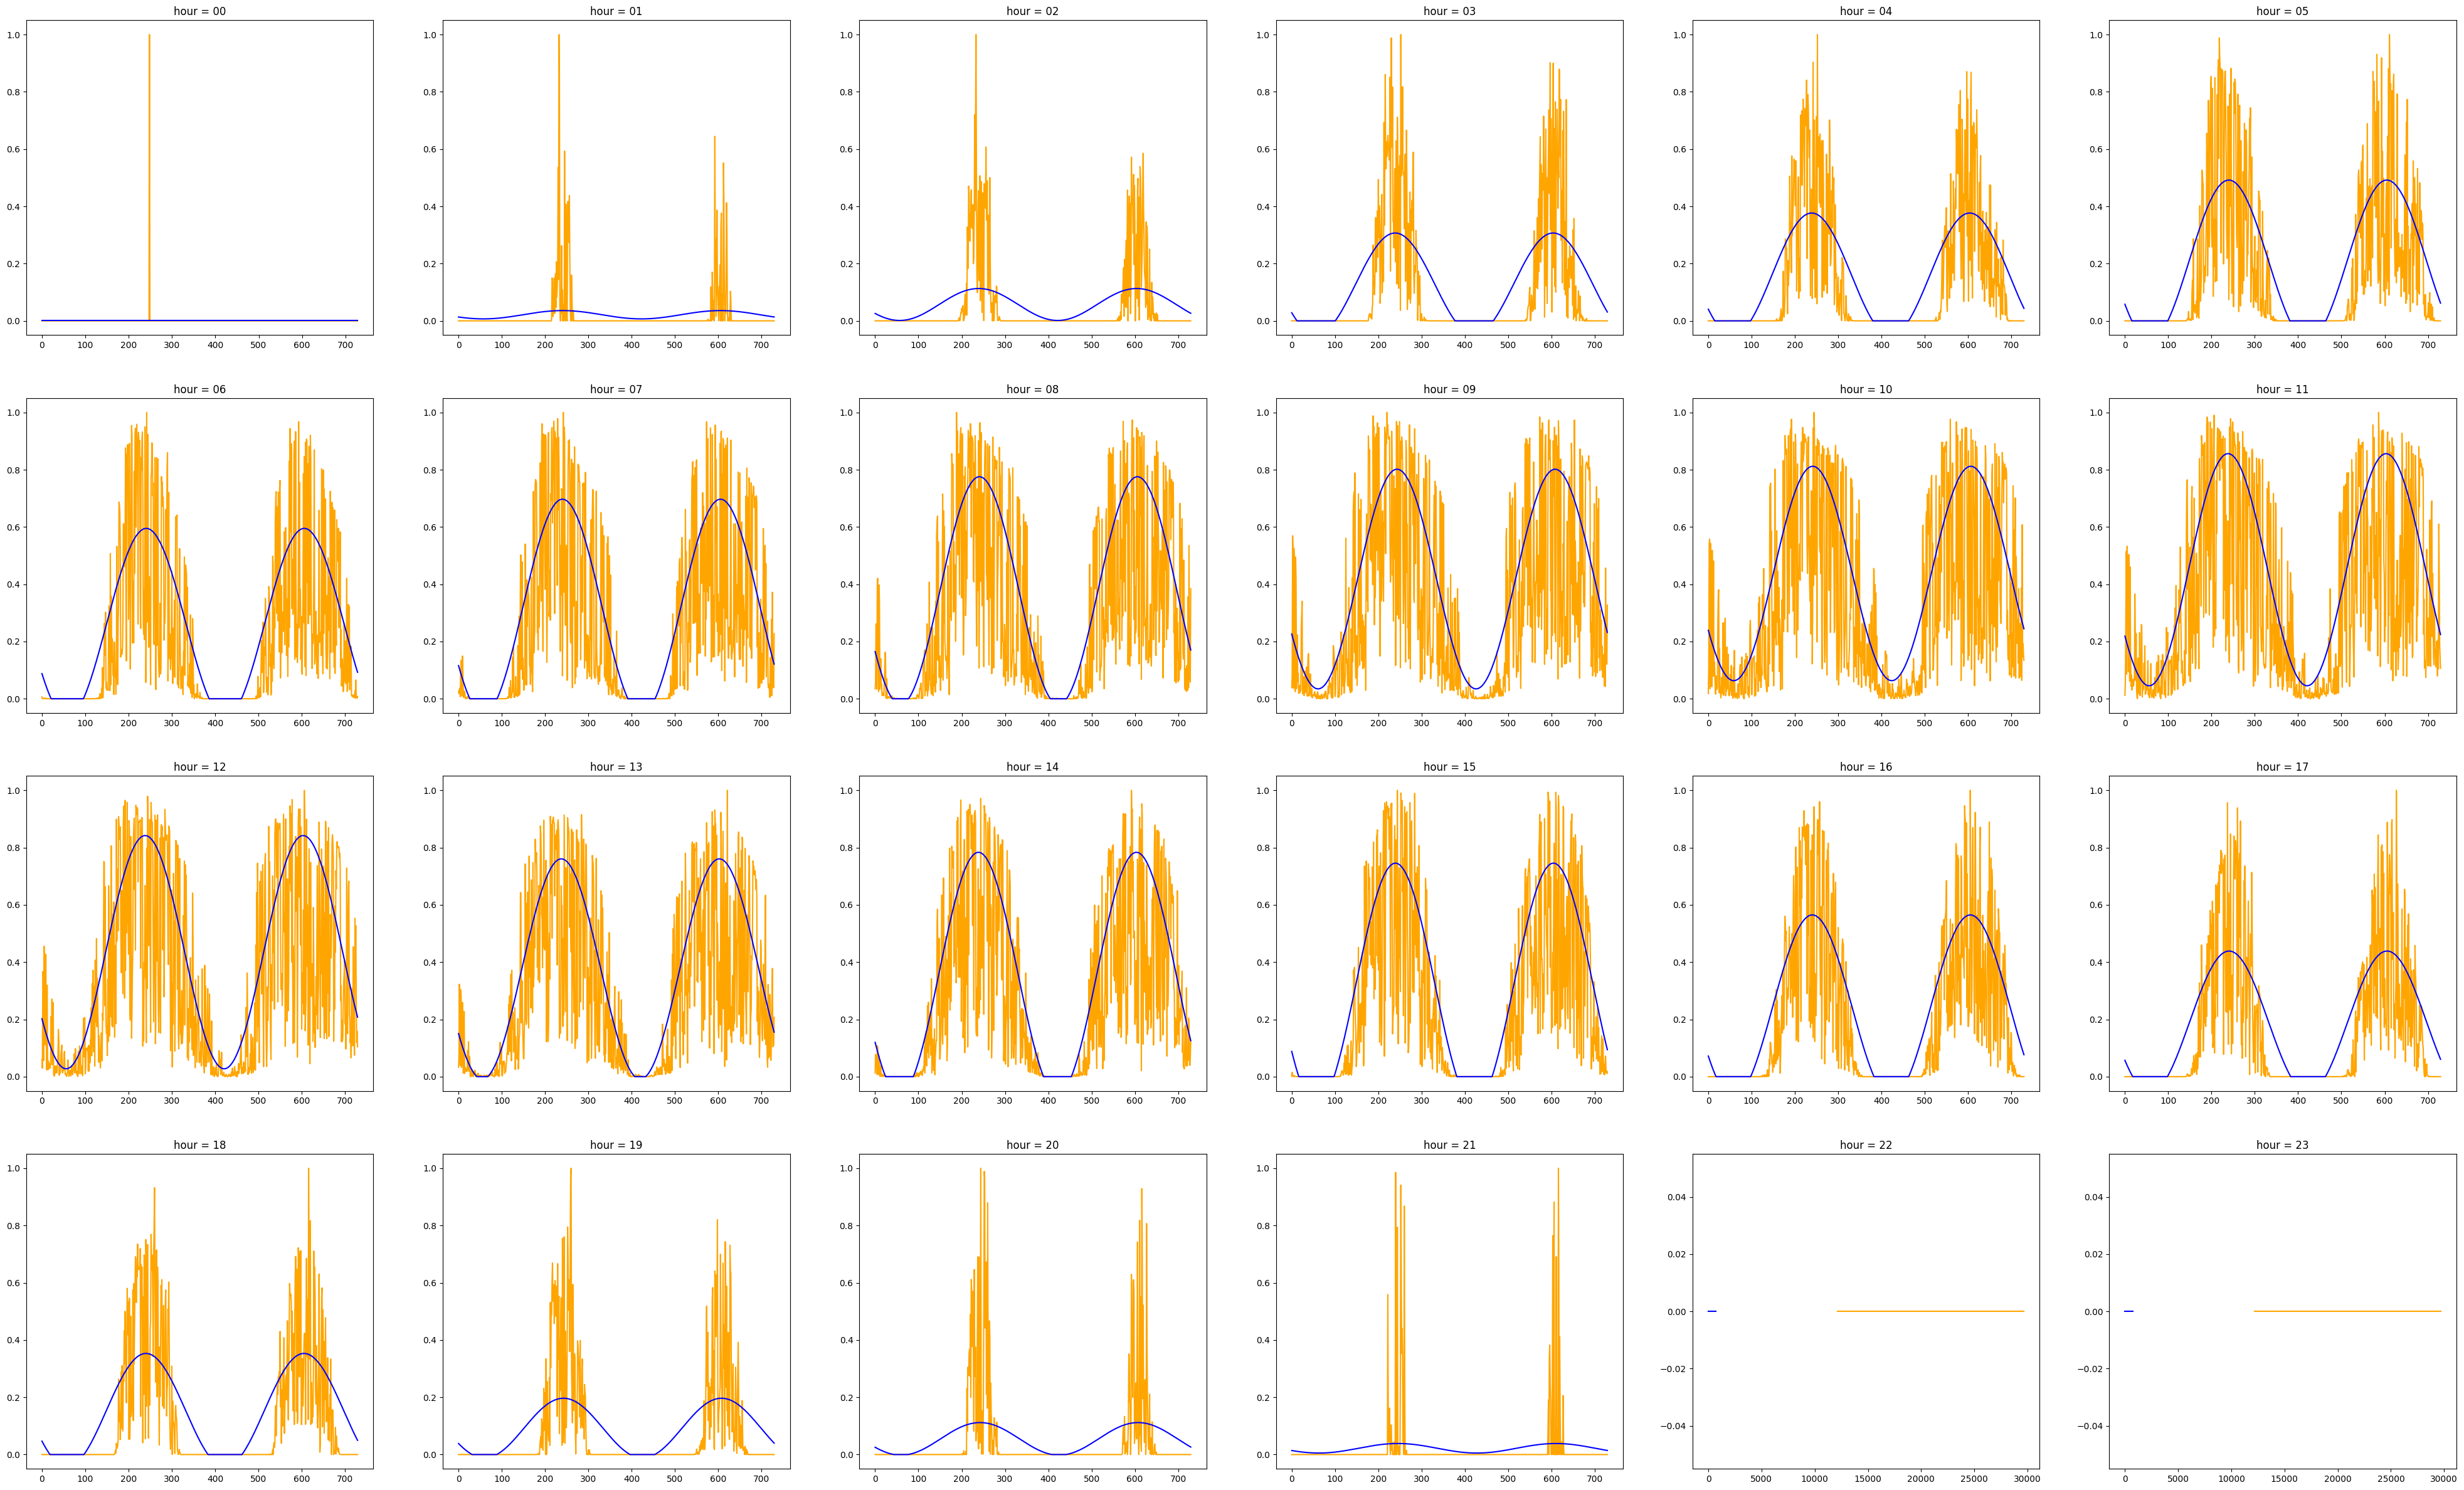

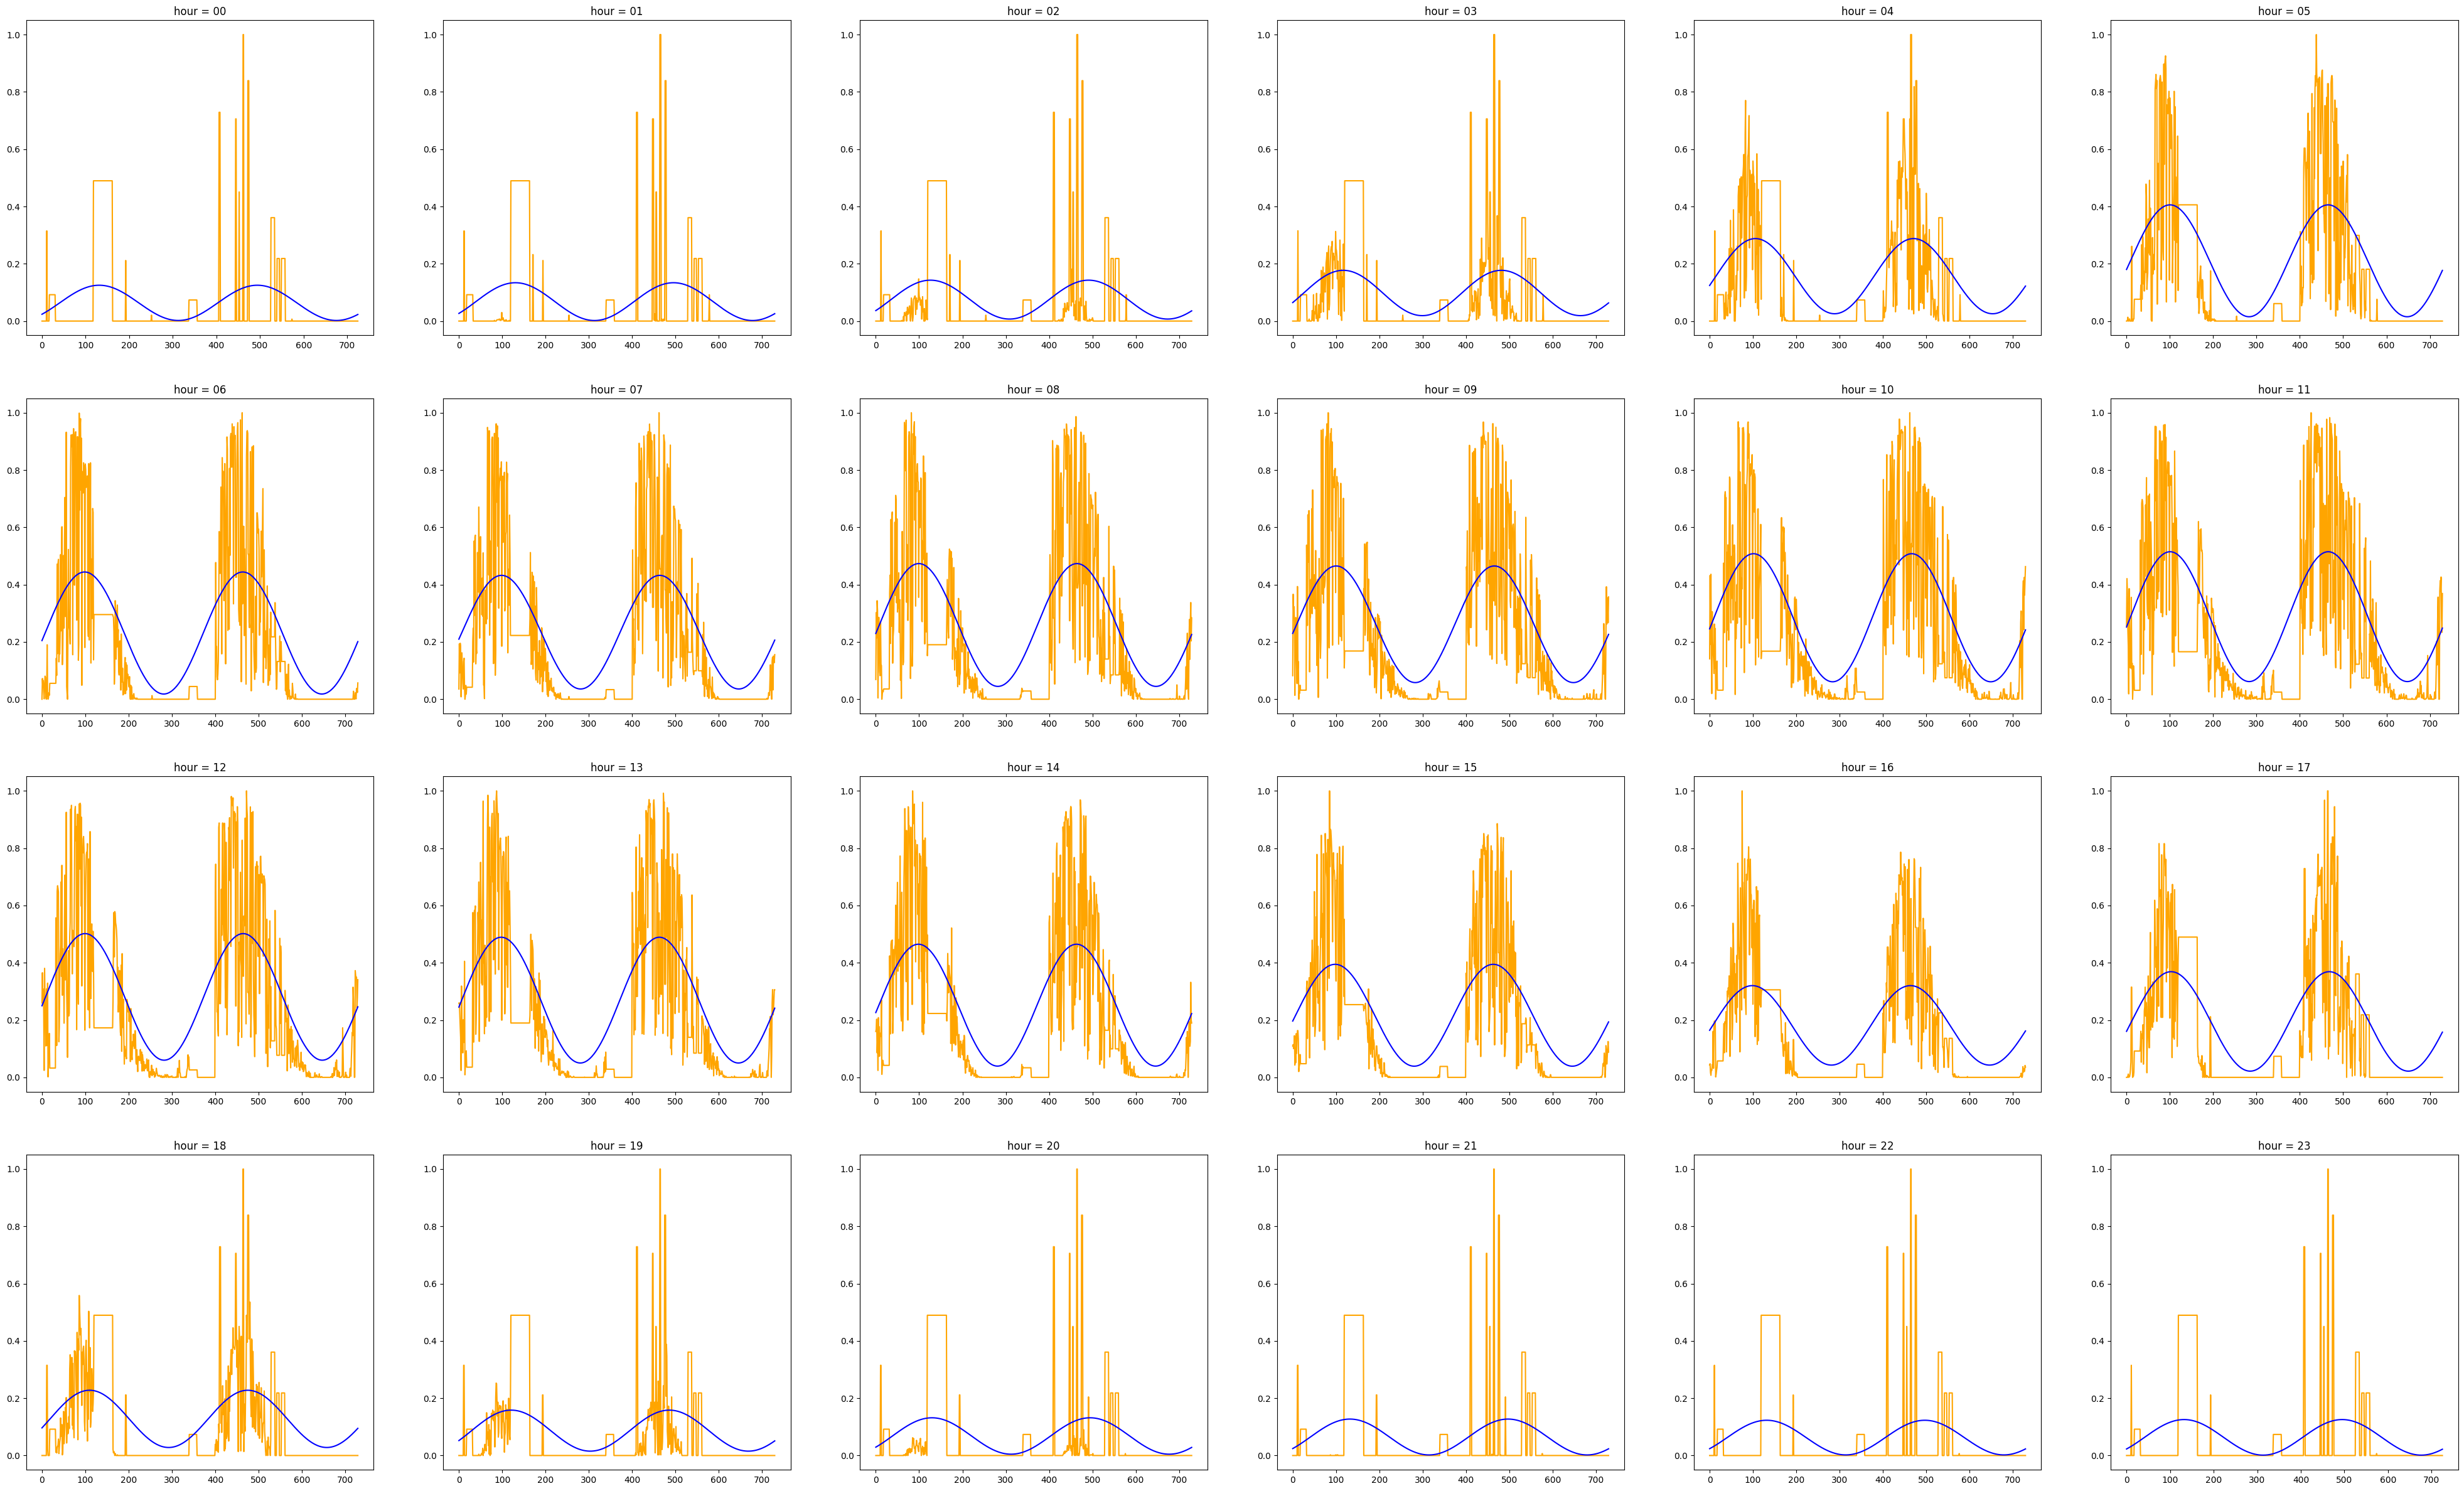

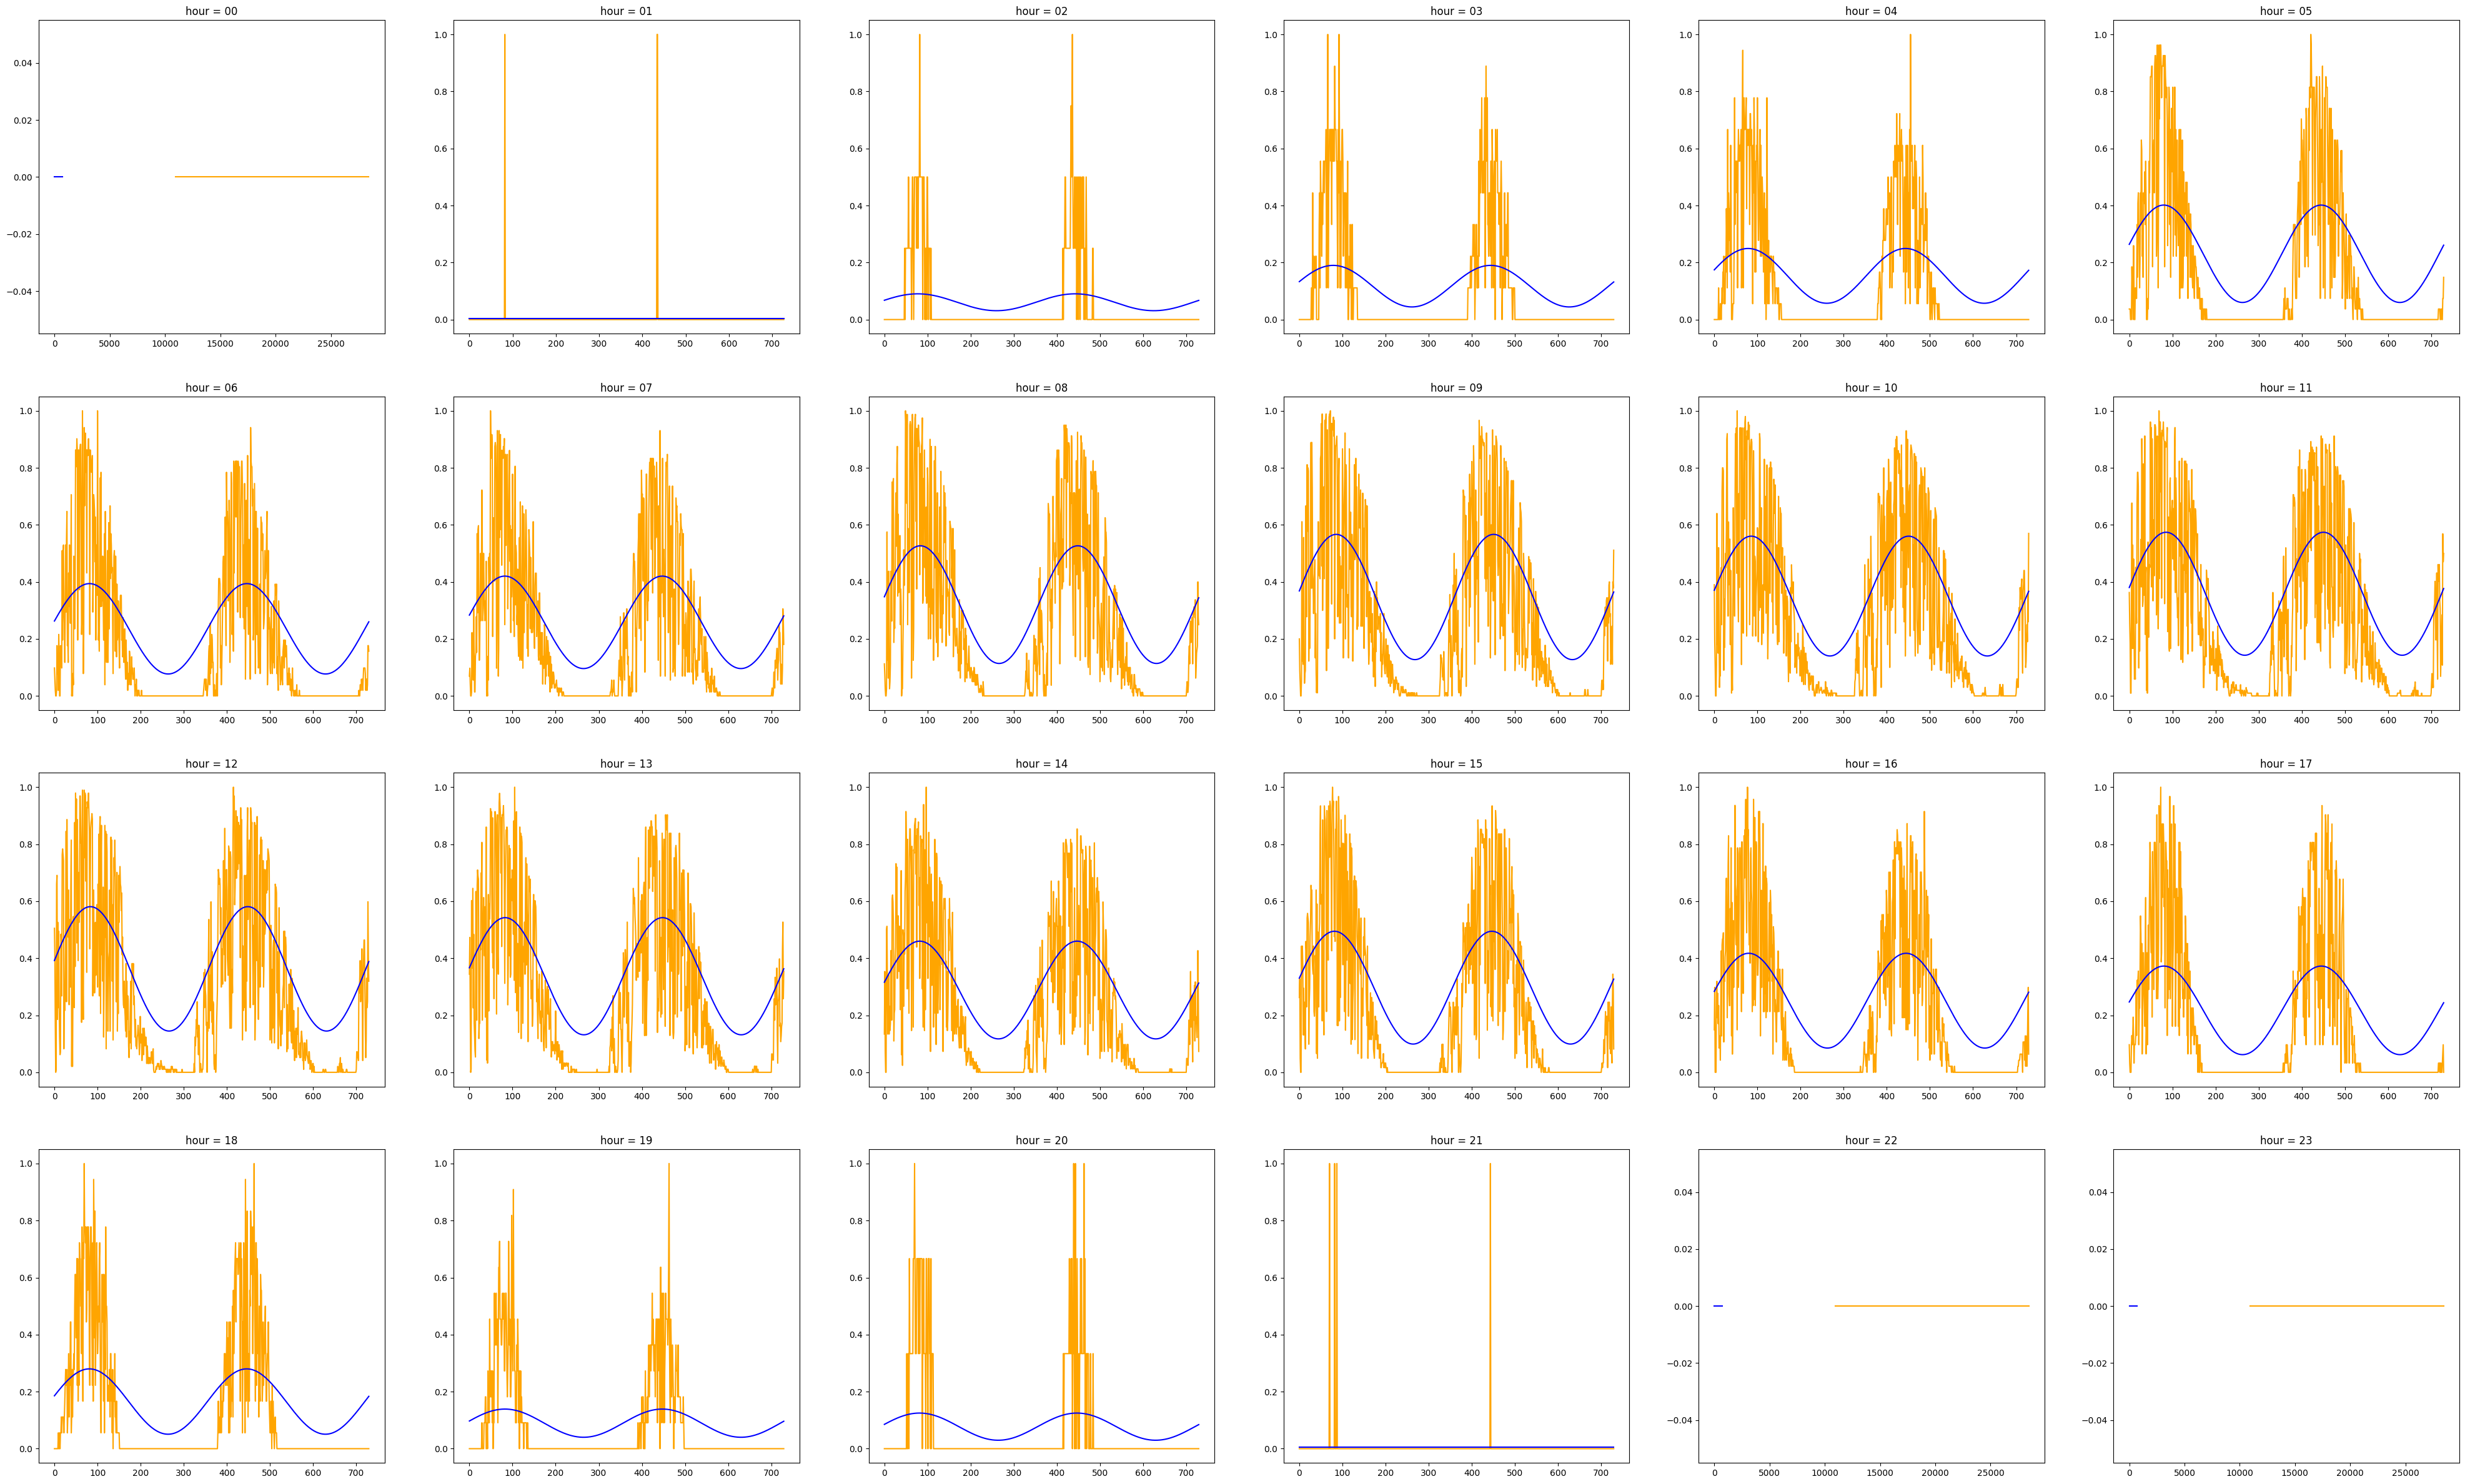

In [1]:
import matplotlib.pylab as plt
import signal_analysis as sa

params = {
    'nb_frequences': 2, 
    'nb_days_to_predict': 0,
    'factor_to_fit': 2
}


y_train, y_pred_train = sa.get_normalized_y_and_pred_separated_by_hours_and_location(**params)

locations = ['a', 'b', 'c']
hours = [ f"0{h}" if h < 10 else str(h) for h in range(24) ]

for loc in locations:
    plt.figure(figsize=(50, 30))
    sp_loc = 1
    for h in hours:
        plt.subplot(4, 6, sp_loc)
        plt.plot(y_train[loc][h], color='orange')
        plt.plot(y_pred_train[loc][h], color='b')
        plt.title(f"hour = {h}")
        sp_loc += 1

In [2]:
import numpy as np
means_pred = []
means_train = []
for loc in locations:
    for h in hours:
        # print('loc', loc, 'hour', h, np.mean(y_train[loc][h]), np.mean(y_pred_train[loc][h]))
        means_pred.append(np.mean(y_pred_train[loc][h]))
        means_train.append(np.mean(y_train[loc][h]))

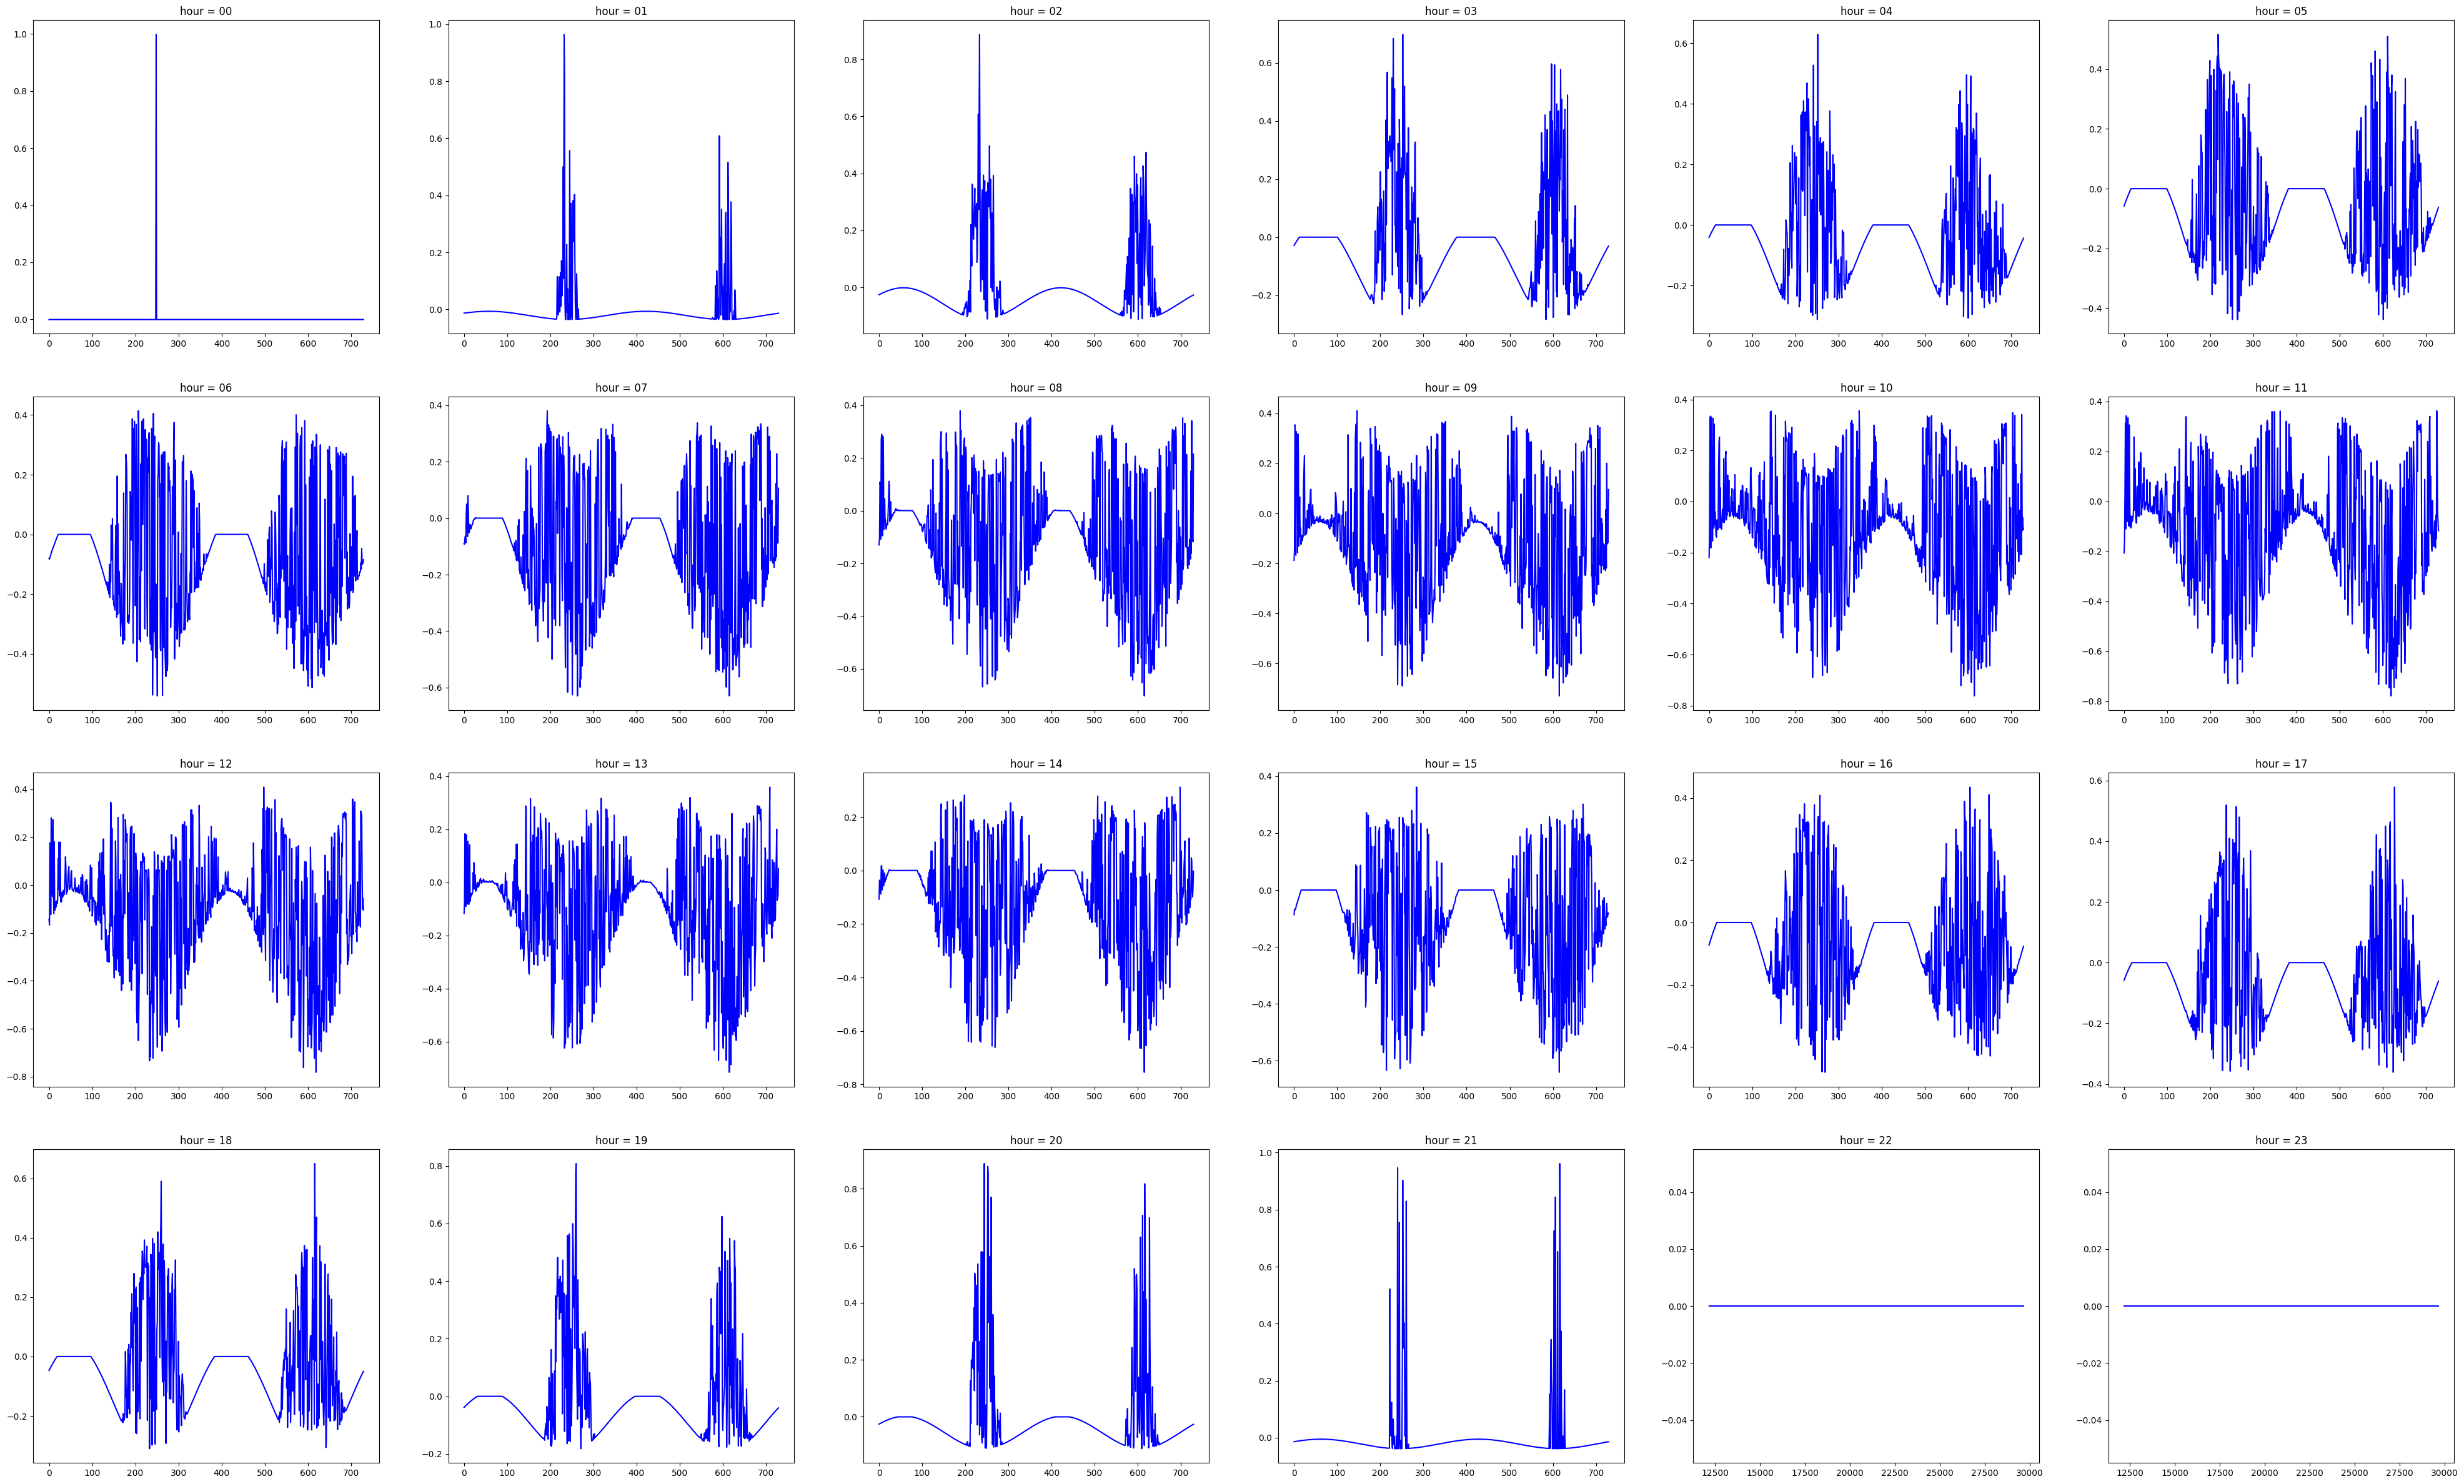

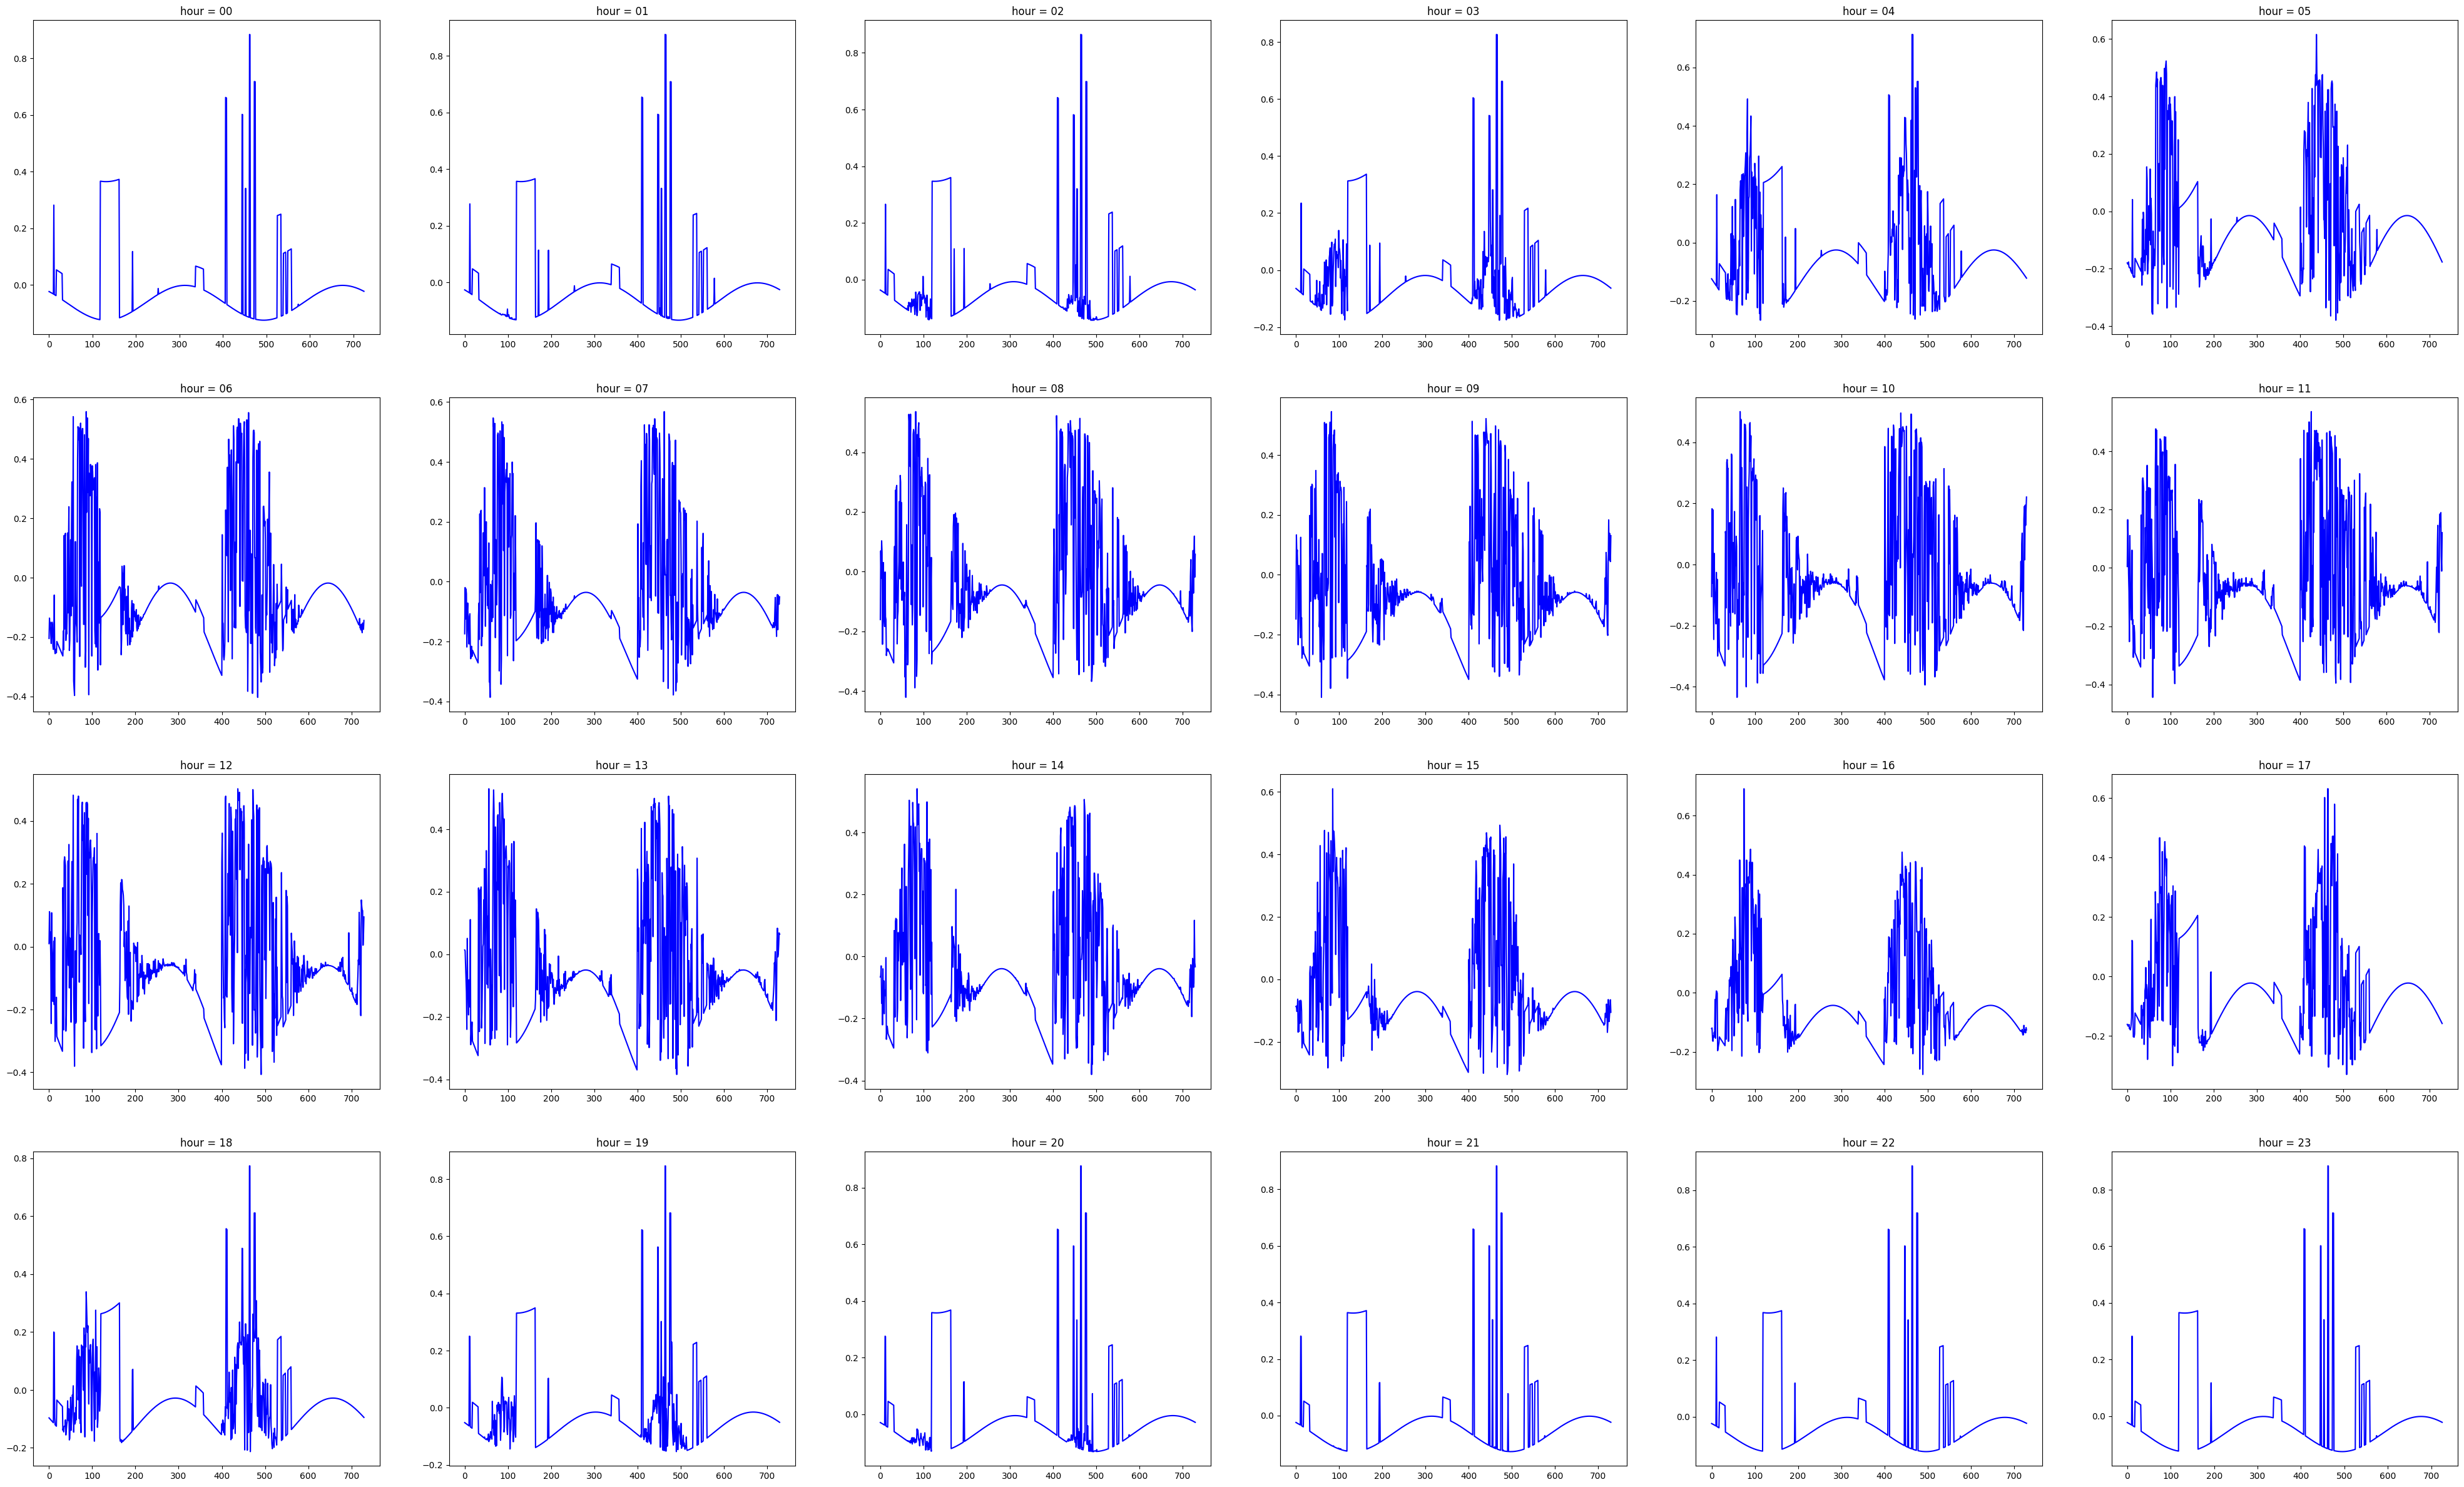

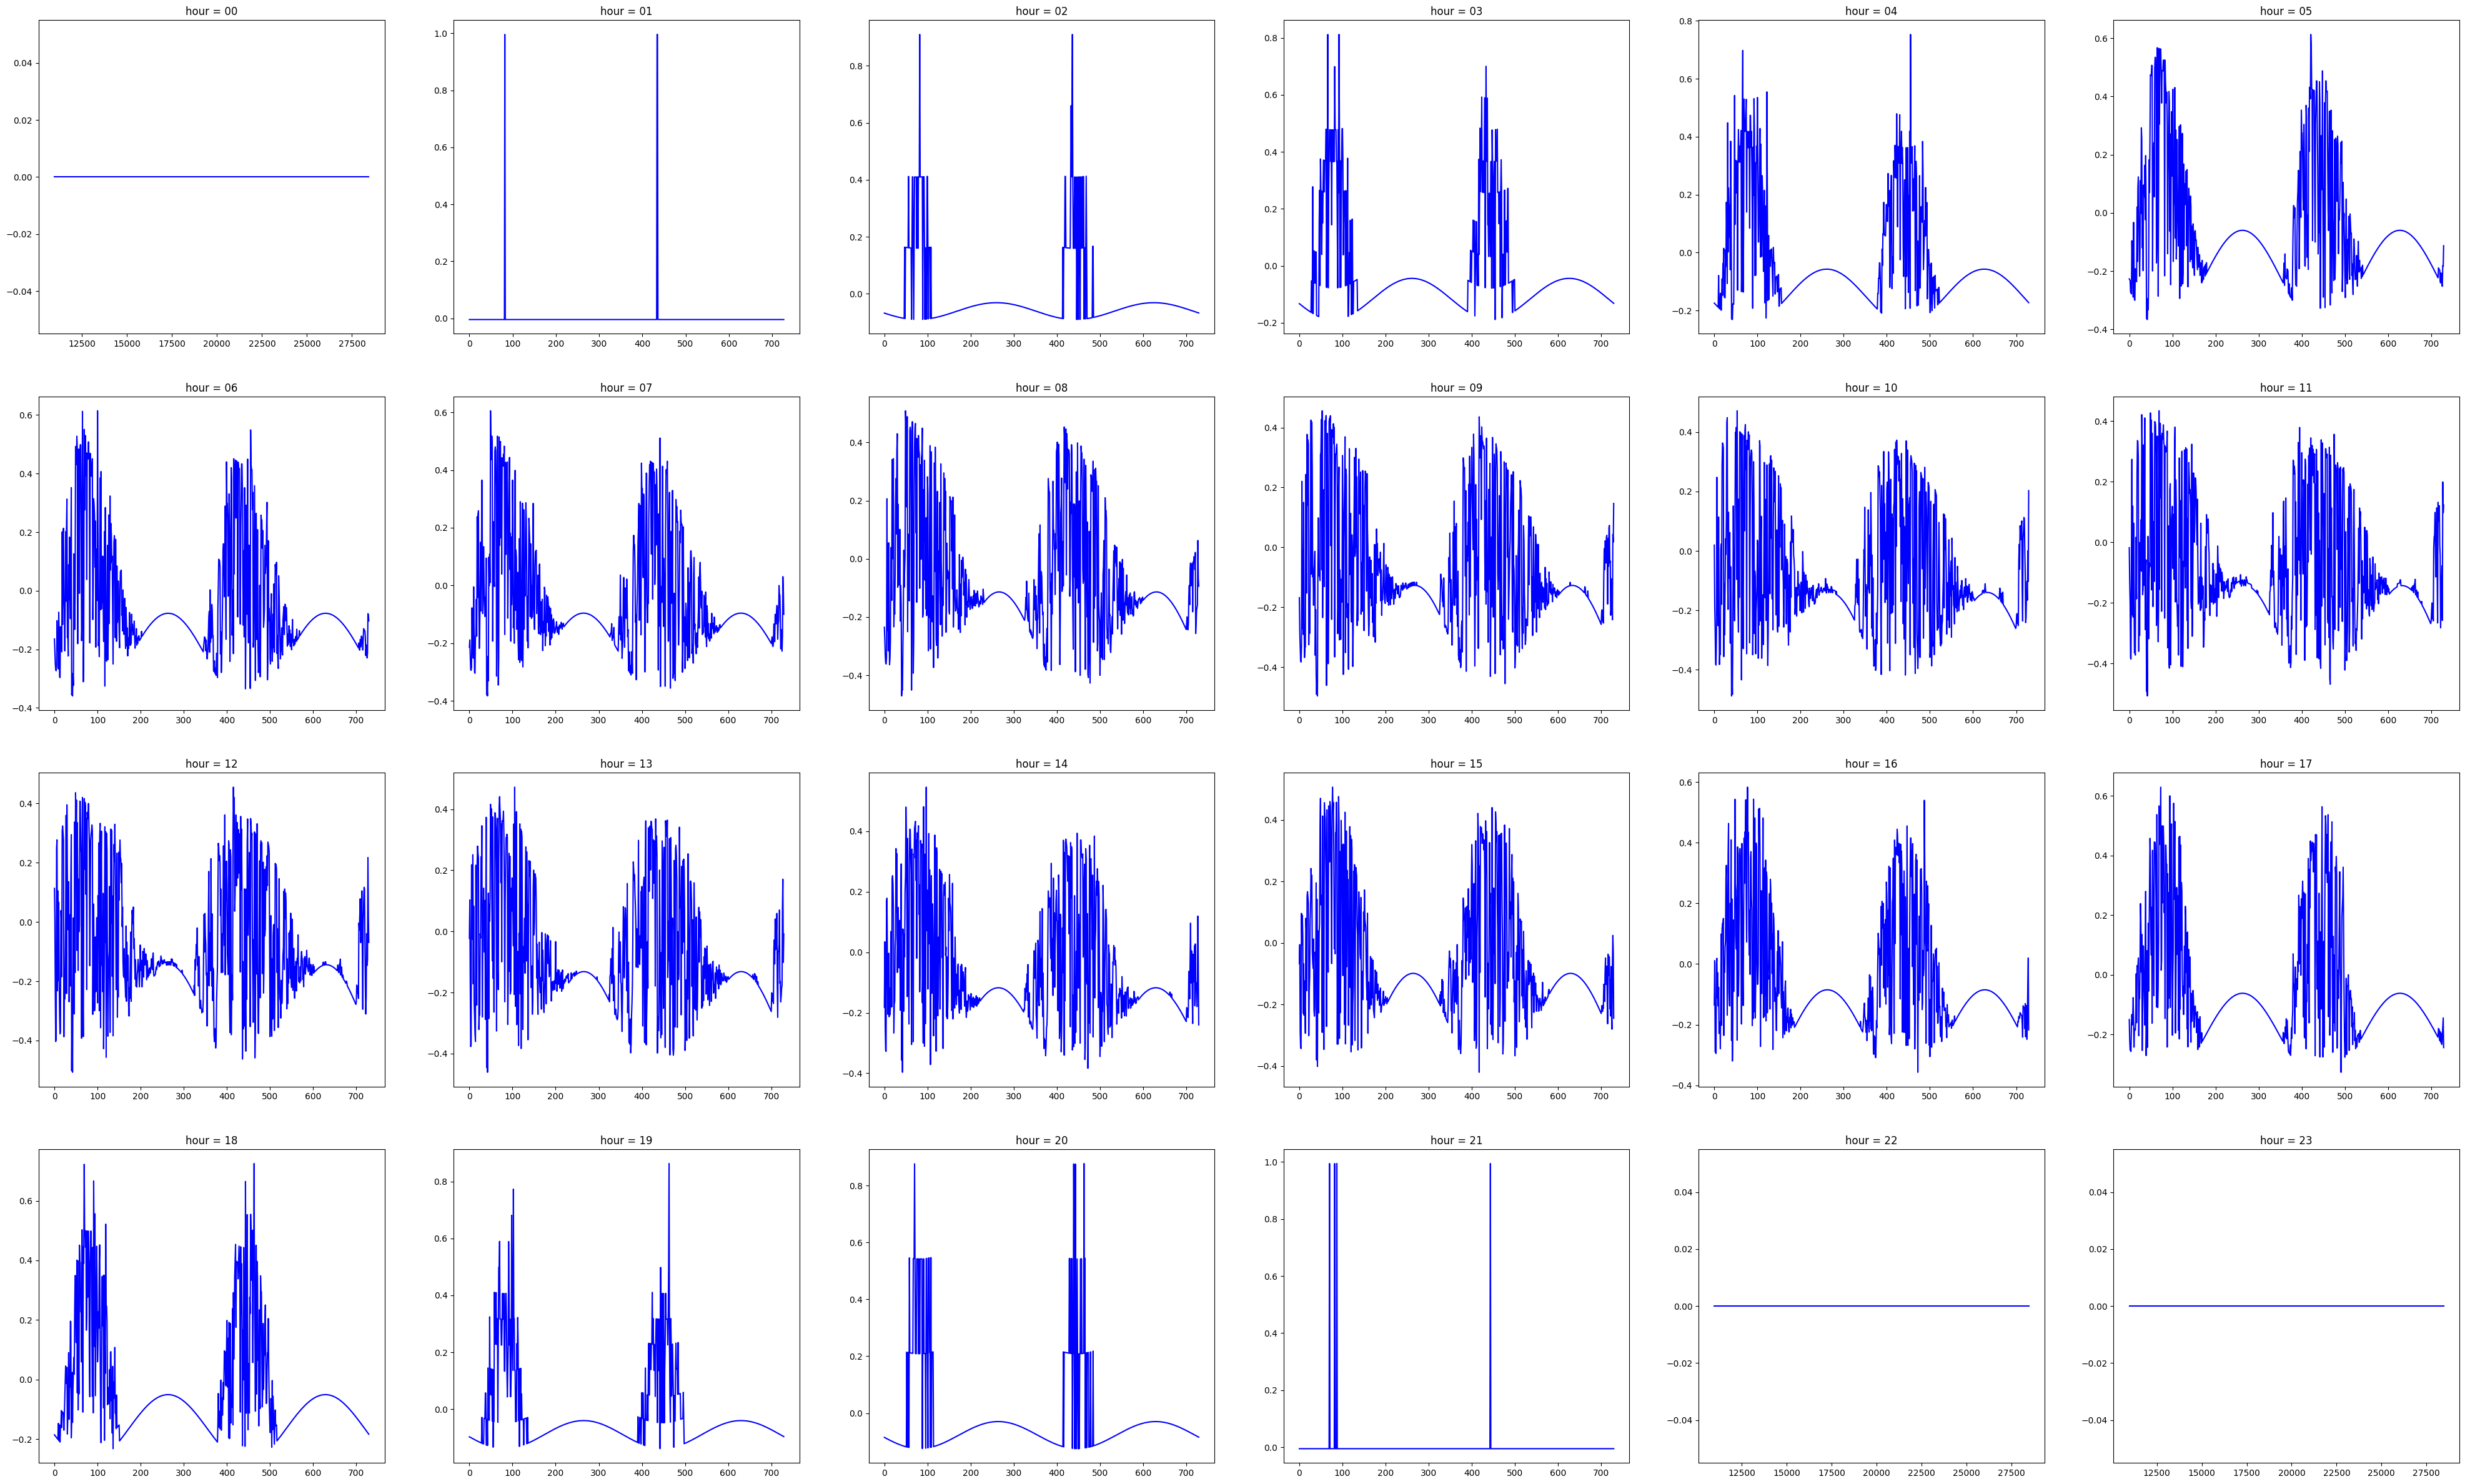

In [3]:
for loc in locations:
    plt.figure(figsize=(50, 30))
    sp_loc = 1
    for h in hours:
        plt.subplot(4, 6, sp_loc)
        plt.plot(y_train[loc][h] - y_pred_train[loc][h], color='b')
        plt.title(f"hour = {h}")
        sp_loc += 1

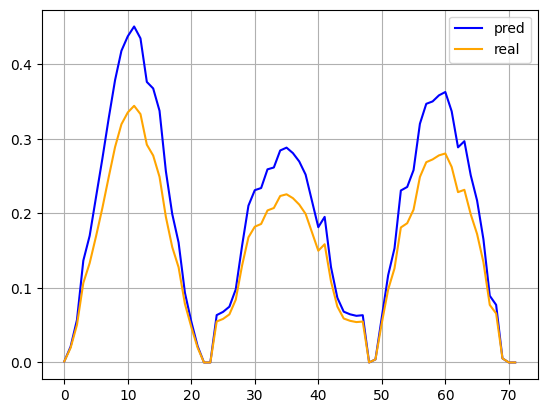

In [4]:
plt.plot(means_pred, c='b', label='pred')
plt.plot(means_train, c='orange', label='real')
plt.legend()
plt.grid()